<a href="https://colab.research.google.com/github/JoshAmpofo/Zummit_Africa_Fellowship/blob/main/UnsupervisedLearningAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task Synopsis**

Explore unsupervised learning techniques for animal classification using the ***Zoo dataset***.

Implement and compare the following unsupervised clustering algorithms:
  1. **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**
  2. **K-Means Clustering**
  3. **Hierarchical Clustering**

- Crucially, for evaluation purposes, *drop the label column* representing the animal class before proceeding with clustering.

- Employ **Mean Squared Error (MSE)** as the evaluation metric to compare the quality of clusters generated by each algorithm by comparing it with the original label column.
  
  *Tips: Maintain a clean and organized code structure with clear comments explaining each step.*

- Use descriptive variable names throughout your code for better readability.

- Experiment with different hyperparameter values to find optimal configurations for each clustering algorithm.

*By focusing on Mean Squared Error and considering alternative evaluation methods for hierarchical clustering, you will gain valuable experience in both unsupervised learning concepts and the importance of appropriate evaluation metrics.*

**Dataset: [Zoo Animals](https://www.kaggle.com/datasets/agajorte/zoo-animals-extended-dataset)**


#**Load basic libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#**Load Datasets**

In [2]:
# mount google drive to access datasets
from google.colab import drive
drive.mount('/content/drive')
# load both datasets
zoo_1 = pd.read_csv('/content/drive/My Drive/Zummit_Datasets/zoo2.csv')
zoo_2 = pd.read_csv('/content/drive/My Drive/Zummit_Datasets/zoo3.csv')
# merge datasets by stacking one on top of the other
zoom = pd.concat([zoo_1, zoo_2], axis=0) # merge using the rows
# reset index
zoom.reset_index(drop=True, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# view merged datasets
zoom

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
109,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
110,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
111,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


#**Examine the Data**

In [4]:
# check for null values
zoom.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [5]:
# describe the data
zoom.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.203540,0.176991,0.831858,0.168142,0.256637,0.380531,0.389381,0.469027,0.761062,0.849558,0.132743,0.159292,2.955752,0.619469,0.132743,0.336283,3.637168
std,0.404424,0.383361,0.375658,0.375658,0.438723,0.487680,0.489782,0.501263,0.428334,0.359097,0.340809,0.367578,2.221604,0.487680,0.340809,0.474541,1.950558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
# get info about data
zoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  113 non-null    object
 1   hair         113 non-null    int64 
 2   feathers     113 non-null    int64 
 3   eggs         113 non-null    int64 
 4   milk         113 non-null    int64 
 5   airborne     113 non-null    int64 
 6   aquatic      113 non-null    int64 
 7   predator     113 non-null    int64 
 8   toothed      113 non-null    int64 
 9   backbone     113 non-null    int64 
 10  breathes     113 non-null    int64 
 11  venomous     113 non-null    int64 
 12  fins         113 non-null    int64 
 13  legs         113 non-null    int64 
 14  tail         113 non-null    int64 
 15  domestic     113 non-null    int64 
 16  catsize      113 non-null    int64 
 17  class_type   113 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 16.0+ KB


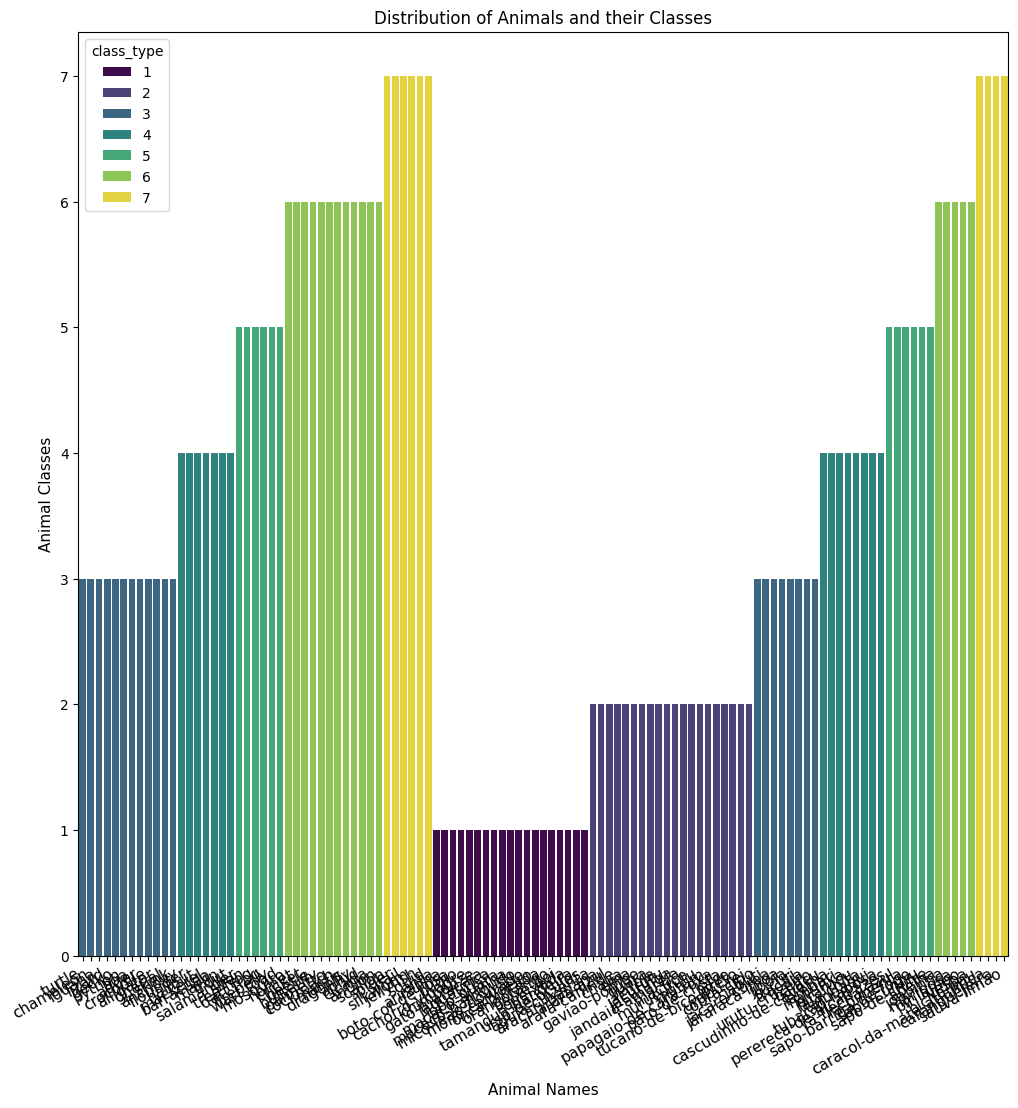

In [7]:
# plot animals against class_type
plt.figure(figsize=(12,12))
sns.barplot(x='animal_name', y='class_type', data=zoom, hue='class_type', palette='viridis')
plt.xlabel('Animal Names', fontsize=11)
plt.ylabel('Animal Classes', fontsize=11)
plt.title('Distribution of Animals and their Classes', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.show()

In [8]:
# view animal names
zoom.animal_name.unique()

array(['turtle', 'chameleon', 'iguana', 'lizard', 'gecko', 'python',
       'boa', 'adder', 'crocodile', 'alligator', 'gharial', 'skink',
       'anchovy', 'flounder', 'halibut', 'mackerel', 'barracuda',
       'marlin', 'trout', 'salamander', 'siren', 'tree frog', 'dart frog',
       'firebelly', 'wart toad', 'mosquito', 'hornet', 'cricket',
       'beetle', 'butterfly', 'palmetto', 'cockroach', 'mantis',
       'dragonfly', 'aphid', 'cicada', 'antlion', 'scallop', 'spider',
       'snail', 'silkworm', 'jellyfish', 'squid', 'anta', 'ariranha',
       'boto-cor-de-rosa', 'bugio', 'cachorro-vinagre', 'chimpanze',
       'gato-maracaja', 'jaguatirica', 'lobo-guara', 'macaco-aranha',
       'macaco-barrigudo', 'mico-leao-dourado', 'mono-carvoeiro',
       'onca-pintada', 'orangotango', 'peixe-boi', 'queixada',
       'tamandua-bandeira', 'urso-de-oculos', 'aguia-cinzenta',
       'aracari-banana', 'arara-azul', 'arara-caninde', 'chaua', 'ema',
       'gaviao-pombo', 'guara', 'harpia', 'ja

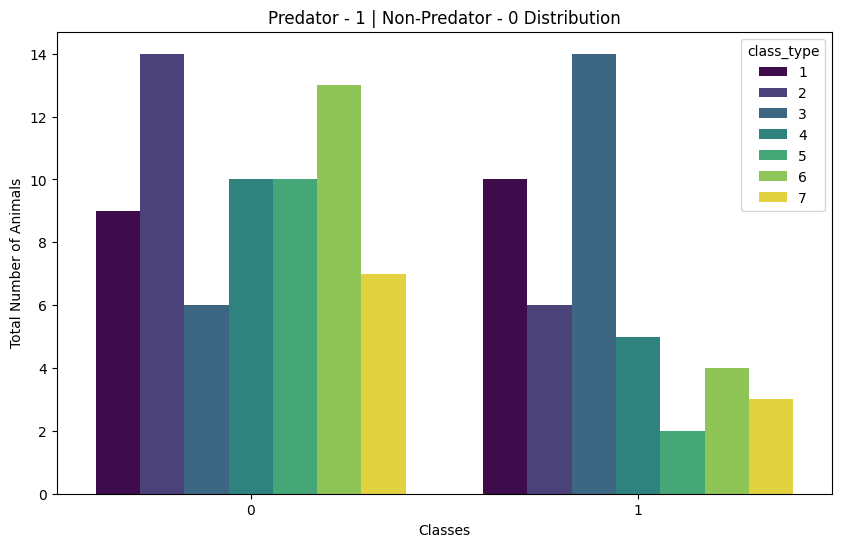

In [9]:
# visualize Predators
plt.figure(figsize=(10, 6))
sns.countplot(x='predator', data=zoom, hue='class_type', palette='viridis')
plt.xlabel('Classes')
plt.ylabel('Total Number of Animals')
plt.title('Predator - 1 | Non-Predator - 0 Distribution', fontsize=12)
plt.show()

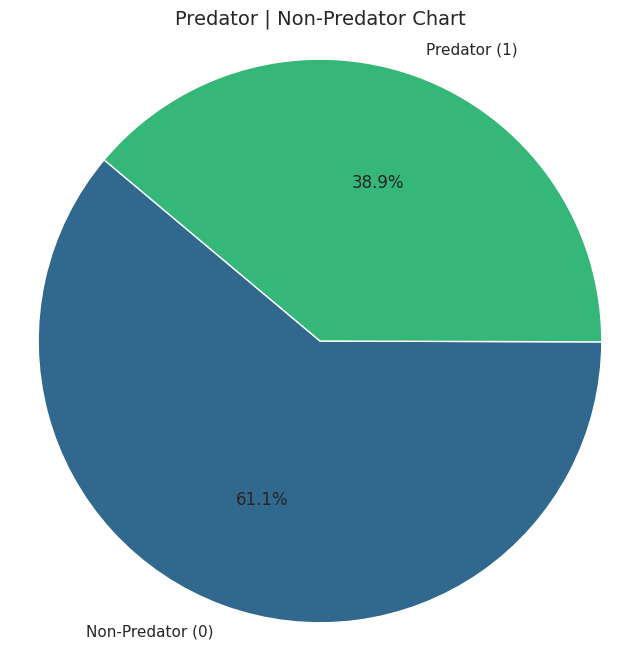

In [10]:
# Aggregate the data
predator_counts = zoom['predator'].value_counts()

# Extract labels and sizes for the pie chart
labels = ['Non-Predator (0)', 'Predator (1)']
sizes = predator_counts.values

# Set Seaborn style
sns.set(style="whitegrid")

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', len(labels))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ensure the pie chart is a circle
plt.axis('equal')

# Add a title
plt.title('Predator | Non-Predator Chart', fontsize=14)

# Display the pie chart
plt.show()


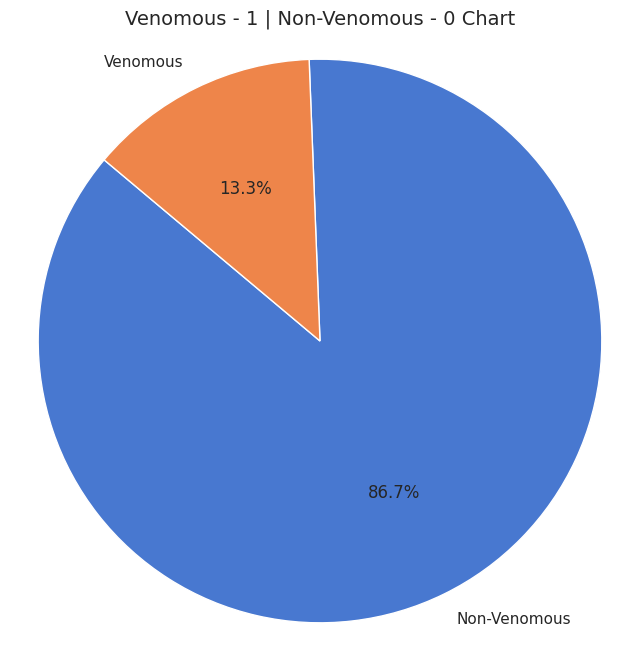

In [11]:
# get total count of venomous orgs
venomous_counts = zoom['venomous'].value_counts()

# set labels and sizes for chart
labels = ['Non-Venomous', 'Venomous']
sizes = venomous_counts.values

# set Seaborn style
sns.set(style="whitegrid")

# pie chart params
plt.figure(figsize=(8, 8))
colors = sns.color_palette('muted', len(labels))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.axis('equal') # set chart as a circle
plt.title('Venomous - 1 | Non-Venomous - 0 Chart', fontsize=14)
plt.show()

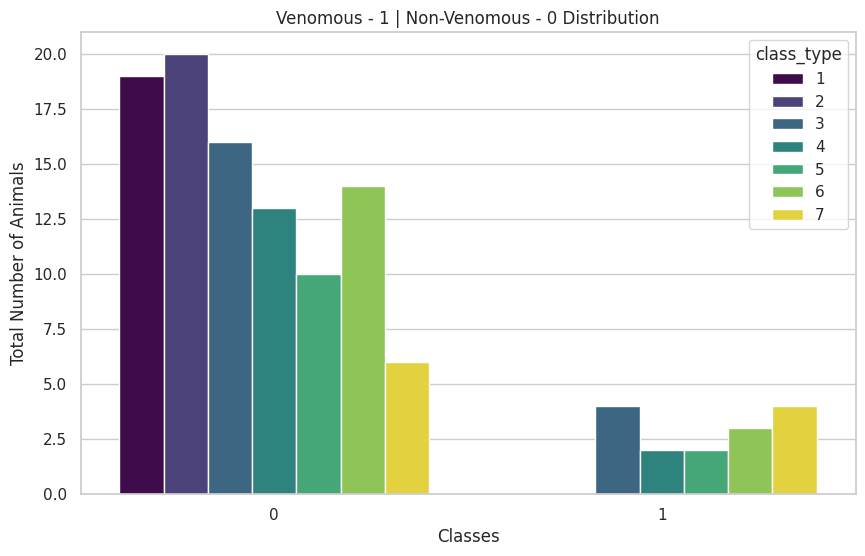

In [12]:
# visualize Venomous animals and their class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='venomous', data=zoom, hue='class_type', palette='viridis')
plt.xlabel('Classes')
plt.ylabel('Total Number of Animals')
plt.title('Venomous - 1 | Non-Venomous - 0 Distribution', fontsize=12)
plt.show()

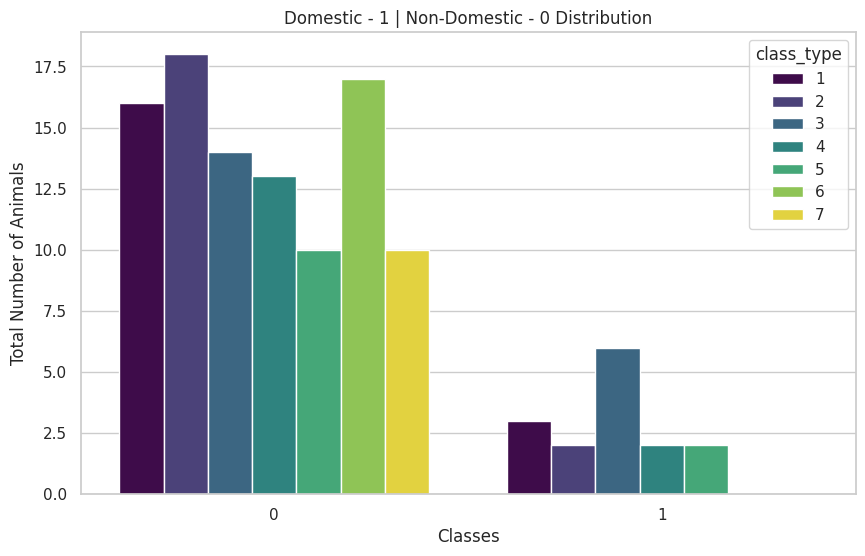

In [13]:
# visualize domestic animal distribution in zoo
plt.figure(figsize=(10, 6))
sns.countplot(x='domestic', data=zoom, hue='class_type', palette='viridis')
plt.xlabel('Classes')
plt.ylabel('Total Number of Animals')
plt.title('Domestic - 1 | Non-Domestic - 0 Distribution', fontsize=12)
plt.show()

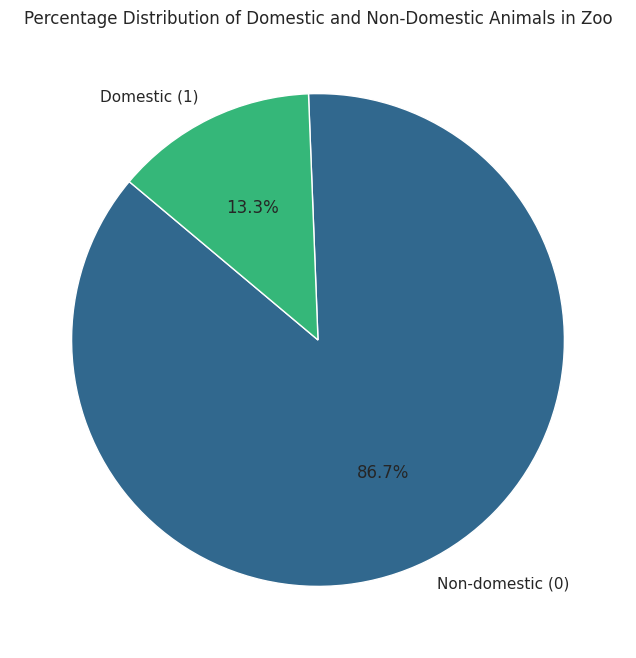

In [49]:
# plot pie chart
# get total count
domestic_count = zoom.domestic.value_counts()
# set labels and sizes
labels = ['Non-domestic (0)', 'Domestic (1)']
sizes = domestic_count.values
# set chart paras
colors = sns.color_palette('viridis', len(labels))
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Domestic and Non-Domestic Animals in Zoo', fontsize=12)
plt.show()

#**Modelling**

#**1. KMeans Clustering**

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

In [16]:
# use elbow method to find an appropriate K value to use
# first drop the categorical variable and the target (class_type)
cols_to_drop = ['animal_name', 'class_type']
zoom_drop = zoom.drop(cols_to_drop, axis=1)
zoom_drop.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [17]:
# perform PCA to reduce dimensions of dataset and use WCSS to plot elbow graph to determine right k to use
# create range of k to explore
k_range = (1, 10)
# create list to store WCSS values
wcss_list = []
# apply PCA
pca = PCA(n_components=0.95) # keep 95% variance
transformed_zoom = pca.fit_transform(zoom_drop)

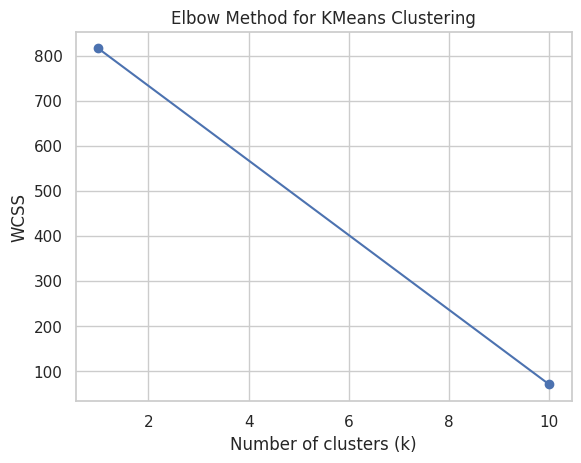

In [18]:
# iterate through k_range and perform k_means clustering
for k in k_range:
  kmeans = KMeans(init='k-means++', n_clusters=k, n_init=12)
  kmeans.fit(transformed_zoom if pca is not None else zoom_drop)

  # calculate WCSS (within cluster sum of squares for elbow method)
  wcss = kmeans.inertia_ # inertia stores the WCSS
  wcss_list.append(wcss)

# plot elbow graph (WCSS vrs k)
plt.plot(k_range, wcss_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for KMeans Clustering', fontsize=12) # doesn't seem to slow down i.e. inertia has no noticeable sloping bumps
plt.show()

In [19]:
# print labels obtained from kmeans optimum clustering using WCSS elbow method
labels = kmeans.labels_
labels

array([9, 9, 1, 1, 9, 7, 7, 7, 1, 1, 1, 9, 2, 2, 2, 2, 2, 2, 2, 9, 0, 9,
       9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 4, 8, 8, 8, 8, 6,
       6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 9, 1, 7, 7, 7,
       9, 7, 2, 2, 2, 2, 7, 2, 2, 2, 9, 9, 9, 9, 1, 1, 5, 5, 5, 5, 5, 5,
       8, 4, 5], dtype=int32)

In [20]:
# introduce labels back into dataset
zoom_drop['Clusters'] = labels
zoom_drop.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Clusters
0,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,9
1,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,9
2,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,1
3,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,1
4,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,9


In [21]:
# group centroids by mean
zoom_drop.groupby('Clusters').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
Clusters,,,,,,,,,,,,,,,,
0,0.500000,0.0,0.5,0.5,0.000000,1.000000,0.000000,1.000000,1.0,1.0,0.000000,0.500000,2.0,1.000000,0.000000,0.000000
1,0.000000,0.0,1.0,0.0,0.000000,0.750000,1.000000,1.000000,1.0,1.0,0.125000,0.000000,4.0,0.750000,0.125000,0.625000
2,0.000000,0.0,1.0,0.0,0.000000,1.000000,0.285714,0.571429,1.0,0.0,0.142857,1.000000,0.0,1.000000,0.142857,0.500000
3,0.000000,1.0,1.0,0.0,0.850000,0.100000,0.300000,0.000000,1.0,1.0,0.000000,0.000000,2.0,0.900000,0.100000,0.700000
4,0.500000,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.500000,0.0,1.0,1.000000,0.000000,8.0,0.000000,0.000000,0.000000
5,0.210526,0.0,1.0,0.0,0.631579,0.000000,0.263158,0.000000,0.0,1.0,0.210526,0.000000,6.0,0.000000,0.000000,0.000000
6,1.000000,0.0,0.0,1.0,0.000000,0.058824,0.529412,0.941176,1.0,1.0,0.000000,0.058824,4.0,0.882353,0.176471,0.294118
7,0.000000,0.0,0.9,0.1,0.000000,0.300000,1.000000,1.000000,1.0,1.0,0.400000,0.200000,0.0,1.000000,0.000000,0.300000
8,0.000000,0.0,1.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.5,0.166667,0.000000,0.0,0.000000,0.000000,0.333333


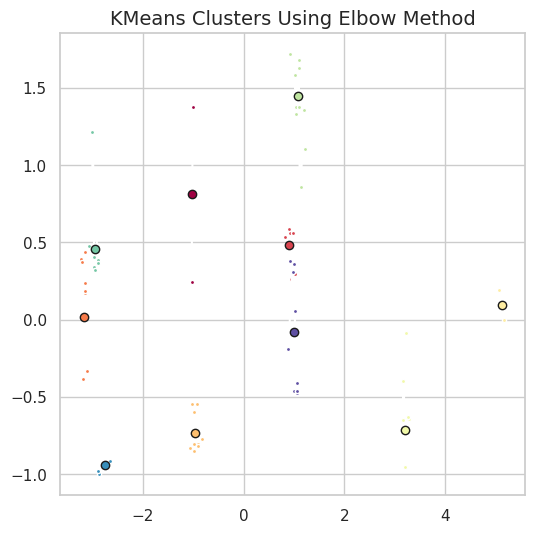

In [22]:
# Plot clusters

#1. kmeans with optimum cluster obtained from wcss
fig = plt.figure(figsize=(6,6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(kmeans.cluster_centers_)), colors):
    my_members = (kmeans.labels_ == k)
    cluster_center = kmeans.cluster_centers_[k]
    ax.plot(transformed_zoom[my_members, 0], transformed_zoom[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('KMeans Clusters Using Elbow Method', fontsize=14)
plt.show()

# Optimising KMeans

In [23]:
# select an appropriate arbitary k since elbow method couldn't identify a suitable k
k = 5
kmeans5 = KMeans(init='k-means++', n_clusters=k, n_init=12)
kmeans5.fit(transformed_zoom) # fit model to non-pca applied data

KMeans(n_clusters=5, n_init=12)

In [24]:
# print labels
labels = kmeans5.labels_
labels

array([0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       2, 3, 3], dtype=int32)

In [25]:
# introduce labels back into dataset
zoom_drop['Clusters'] = labels
zoom_drop.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Clusters
0,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,0
1,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,0
2,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,0
3,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,0
4,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,0


In [26]:
# group centroids by mean
zoom_drop.groupby('Clusters').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
Clusters,,,,,,,,,,,,,,,,
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.782609,0.347826,0.695652,1.0,1.000000,0.086957,0.000000,4.000000,0.478261,0.347826,0.304348
1,0.000000,0.952381,1.000000,0.000000,0.809524,0.142857,0.285714,0.047619,1.0,1.000000,0.000000,0.000000,2.000000,0.904762,0.095238,0.666667
2,0.000000,0.000000,0.966667,0.033333,0.000000,0.666667,0.466667,0.600000,0.8,0.433333,0.233333,0.533333,0.000000,0.800000,0.066667,0.400000
3,0.238095,0.000000,1.000000,0.000000,0.571429,0.000000,0.333333,0.047619,0.0,1.000000,0.285714,0.000000,6.190476,0.000000,0.000000,0.000000
4,1.000000,0.000000,0.000000,1.000000,0.000000,0.111111,0.500000,0.944444,1.0,1.000000,0.000000,0.111111,3.888889,0.888889,0.166667,0.277778


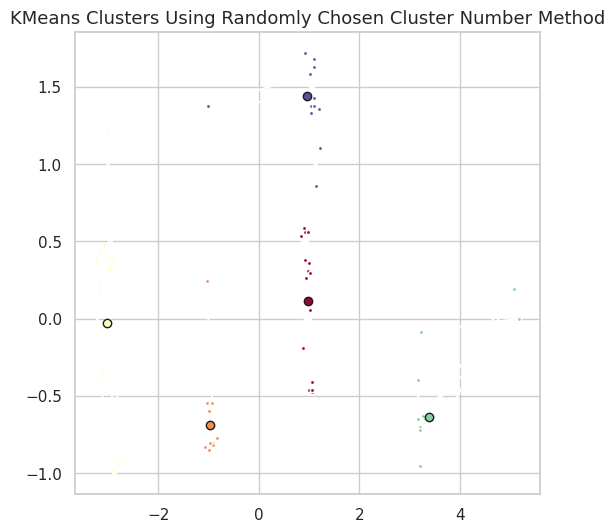

In [27]:
#2. kmeans plot with cluster number = 5
fig = plt.figure(figsize=(6,6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans5.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(kmeans.cluster_centers_)), colors):
    my_members = (kmeans5.labels_ == k)
    cluster_center = kmeans5.cluster_centers_[k]
    ax.plot(transformed_zoom[my_members, 0], transformed_zoom[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('KMeans Clusters Using Randomly Chosen Cluster Number Method', fontsize=13)
plt.show()

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# from sklearn.manifold import TSNE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

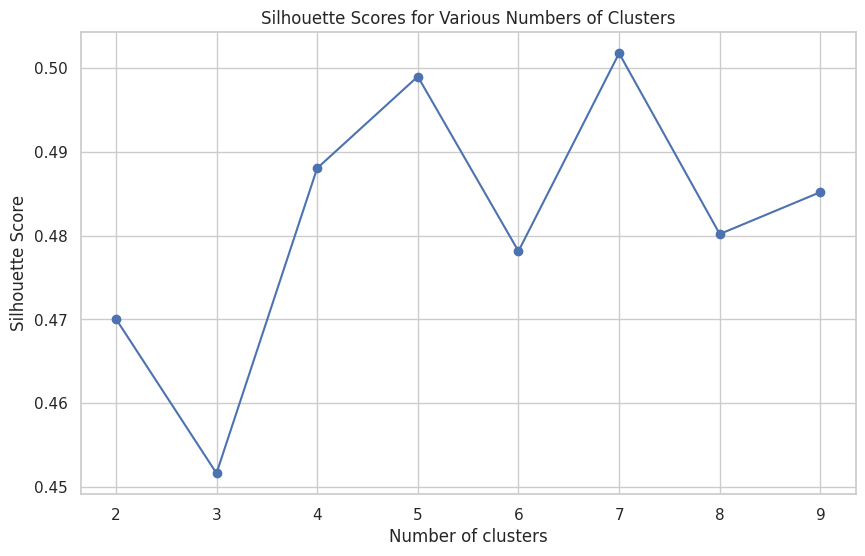

In [29]:
# use silhouette scores to determine the optimum k to use
silhouette_scores = []
cluster_range = range(2, 10)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(transformed_zoom)
    score = silhouette_score(transformed_zoom, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
# silhouette scores show that 6 n_clusters will be optimum

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


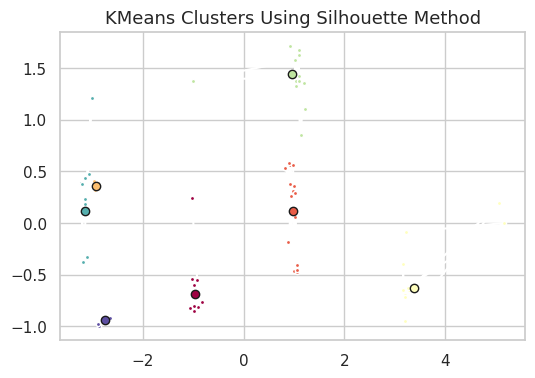

In [30]:
optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2

# Apply KMeans with the optimal number of clusters
kmeans_op = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_op.fit(transformed_zoom)

# visualize clusters
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_op.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(kmeans_op.cluster_centers_)), colors):
    my_members = (kmeans_op.labels_ == k)
    cluster_center = kmeans_op.cluster_centers_[k]
    ax.plot(transformed_zoom[my_members, 0], transformed_zoom[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('KMeans Clusters Using Silhouette Method', fontsize=13)
plt.show()

# Silhouette method seems to be much better than Elbow method here

In [31]:
# Evaluate the clustering
# silhouette method measures cohesion and separation and ranges between -1 and 1: Negative values mean poor and wrong clustering, while 1 or closer to 1 means very good and perfect separation
silhouette_avg_orig = silhouette_score(transformed_zoom, kmeans.labels_)
silhouette_avg_5 = silhouette_score(transformed_zoom, kmeans5.labels_)
silhouette_avg_op = silhouette_score(transformed_zoom, kmeans_op.labels_)


# print scores
print(f'Silhouette Score for n_cluster=5: {silhouette_avg_5}')
print(f'Silhouette Score for silhouette optimised cluster number: {silhouette_avg_op}')
print(f'Silhouette Score for elbow_method: {silhouette_avg_orig}')

Silhouette Score for n_cluster=5: 0.4989729717517616
Silhouette Score for silhouette optimised cluster number: 0.5017467116861856
Silhouette Score for elbow_method: 0.48518919347430517


In [32]:
# davies_bouldin method measures average similarity ratio of each cluster with the cluster that is most similar to it. DBI value between 0 and 1 indicates good clustering
davies_bouldin_avg_orig = davies_bouldin_score(transformed_zoom, kmeans.labels_)
davies_bouldin_avg_5 = davies_bouldin_score(transformed_zoom, kmeans5.labels_)
davies_bouldin_avg_op = davies_bouldin_score(transformed_zoom, kmeans_op.labels_)

# print scores
print(f'DBI score for elbow method: {davies_bouldin_avg_orig}')
print(f'DBI score for n_clust=5 method: {davies_bouldin_avg_5}')
print(f'DBI score for silhouette optimised cluster number: {davies_bouldin_avg_op}')

DBI score for elbow method: 0.8248598759461264
DBI score for n_clust=5 method: 0.8393793910835363
DBI score for silhouette optimised cluster number: 0.8410417092955534


In [33]:
# The Calinski-Harabasz Index (CHI) evaluates the ratio of the sum of between-cluster dispersion to the sum of within-cluster dispersion.
# Between-Cluster Dispersion: Measures the separation between clusters.
# Within-Cluster Dispersion: Measures the compactness of clusters.
# doesn't have any upper bounds but very high values mean very good clustering and compactness
calinski_harabasz_avg_orig = calinski_harabasz_score(transformed_zoom, kmeans.labels_)
calinski_harabasz_avg_5 = calinski_harabasz_score(transformed_zoom, kmeans5.labels_)
calinski_harabasz_avg_op = calinski_harabasz_score(transformed_zoom, kmeans_op.labels_)

# print scores
print(f'CHI score for elbow method: {calinski_harabasz_avg_orig}')
print(f'CHI score for n_clust=5 method: {calinski_harabasz_avg_5}')
print(f'CHI score for silhouette optimised cluster number: {calinski_harabasz_avg_op}')

CHI score for elbow method: 124.83909934171417
CHI score for n_clust=5 method: 146.0641498760397
CHI score for silhouette optimised cluster number: 133.63004844711156


In [34]:
# evaluating using MSEs
from sklearn.metrics import mean_squared_error

# Get cluster centers and labels

# for elbow k
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# for silhouette k
cluster_centers_sil = kmeans_op.cluster_centers_
cluster_labels_sil = kmeans_op.labels_

# for fixed k
cluster_centers5 = kmeans5.cluster_centers_
cluster_labels5 = kmeans5.labels_

# Calculate squared distances to cluster centers for each data point
squared_distances = []
squared_distances_sil = []
squared_distances5 = []

for i, point in enumerate(transformed_zoom):
  center = cluster_centers[cluster_labels[i]]  # Get center for assigned cluster
  center2 = cluster_centers[cluster_labels_sil[i]] # silhouette meth
  center3 = cluster_centers[cluster_labels5[i]] # n_clust=5 meth

  # Squared distances
  squared_distances.append(np.sum((point - center) ** 2))
  squared_distances_sil.append(np.sum((point - center2) ** 2))
  squared_distances5.append(np.sum((point - center3) ** 2))

# Calculate MSE
mse = mean_squared_error(transformed_zoom, cluster_centers[cluster_labels])
mse_sil = mean_squared_error(transformed_zoom, cluster_centers[cluster_labels_sil])
mse5 = mean_squared_error(transformed_zoom, cluster_centers[cluster_labels5])

# Print the calculated MSE
print("MSE for Elbow Method:", mse)
print("MSE for silhouette Method:", mse_sil)
print("MSE for n_clust=5 Method:", mse5)

# NO hard or fast method when it comes to MSE for KMeans clustering.
# Datasize is too small but generally lower MSEs are good indicators but MSEs should be used in conjunction with the previous metrics above: DBI, CHI and silhouette scores

MSE for Elbow Method: 0.08509710668636533
MSE for silhouette Method: 2.1976146549492857
MSE for n_clust=5 Method: 0.7490708099407823


#**2. Hierarchical Clustering**

In [35]:
from scipy.cluster import hierarchy
#from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
# drop Clusters column from dataset
zoom_drop = zoom_drop.drop('Clusters', axis=1)
# first create numpy array of dataset values
feature_matrix = zoom_drop.values
# calculate the euclidean distances
dist_matrix = euclidean_distances(feature_matrix,feature_matrix)
dist_matrix

array([[0.        , 1.73205081, 1.73205081, ..., 4.58257569, 4.89897949,
        3.46410162],
       [1.73205081, 0.        , 1.41421356, ..., 4.47213595, 4.79583152,
        3.31662479],
       [1.73205081, 1.41421356, 0.        , ..., 4.69041576, 4.79583152,
        3.31662479],
       ...,
       [4.58257569, 4.47213595, 4.69041576, ..., 0.        , 8.18535277,
        6.244998  ],
       [4.89897949, 4.79583152, 4.79583152, ..., 8.18535277, 0.        ,
        2.        ],
       [3.46410162, 3.31662479, 3.31662479, ..., 6.244998  , 2.        ,
        0.        ]])

<ipython-input-37-921bc4bf44c5>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


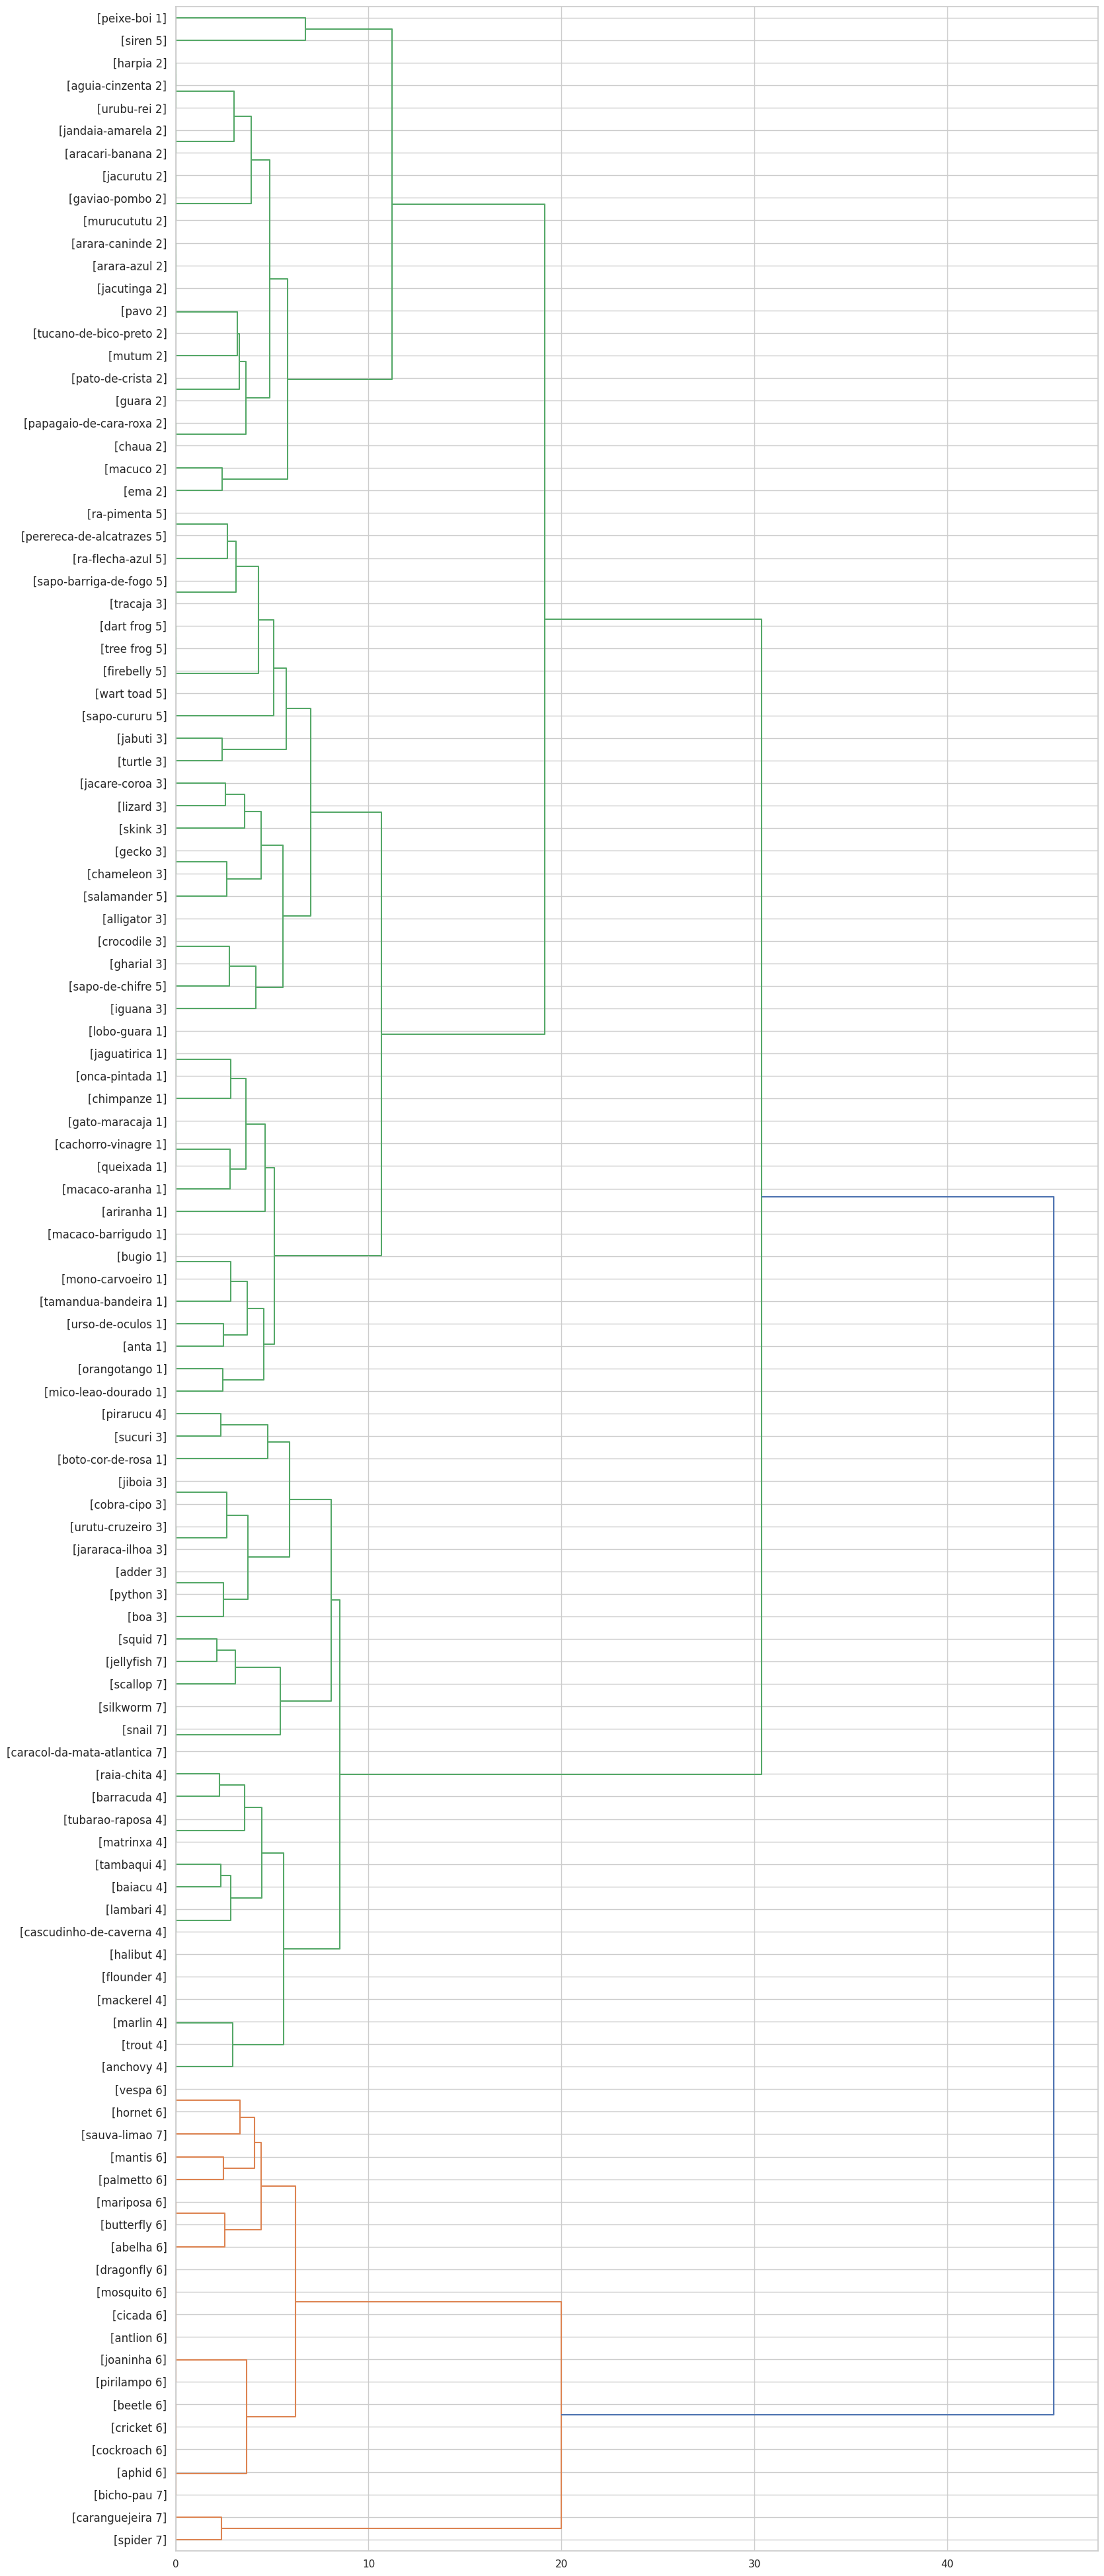

In [37]:
# plot dendrogram using dist matrices
Z = hierarchy.linkage(dist_matrix, 'complete')
fig = plt.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (zoom['animal_name'][id], zoom['class_type'][id])

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [38]:
# use agglomerative clustering to cluster data
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=6)

In [39]:
agglom.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       2, 3, 4])

In [40]:
zoom['cluster_'] = agglom.labels_
zoom.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,cluster_
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3,0
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3,0
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3,0
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3,0
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3,0


In [41]:
# group features by cluster.
# this shows there are 6 main clusters
zoom.groupby(['cluster_','class_type'])['cluster_'].count()

cluster_  class_type
0         1             17
          3             12
          5             11
1         1              1
          5              1
2         1              1
          3              8
          4             15
          7              6
3         7              2
4         6             17
          7              2
5         2             20
Name: cluster_, dtype: int64

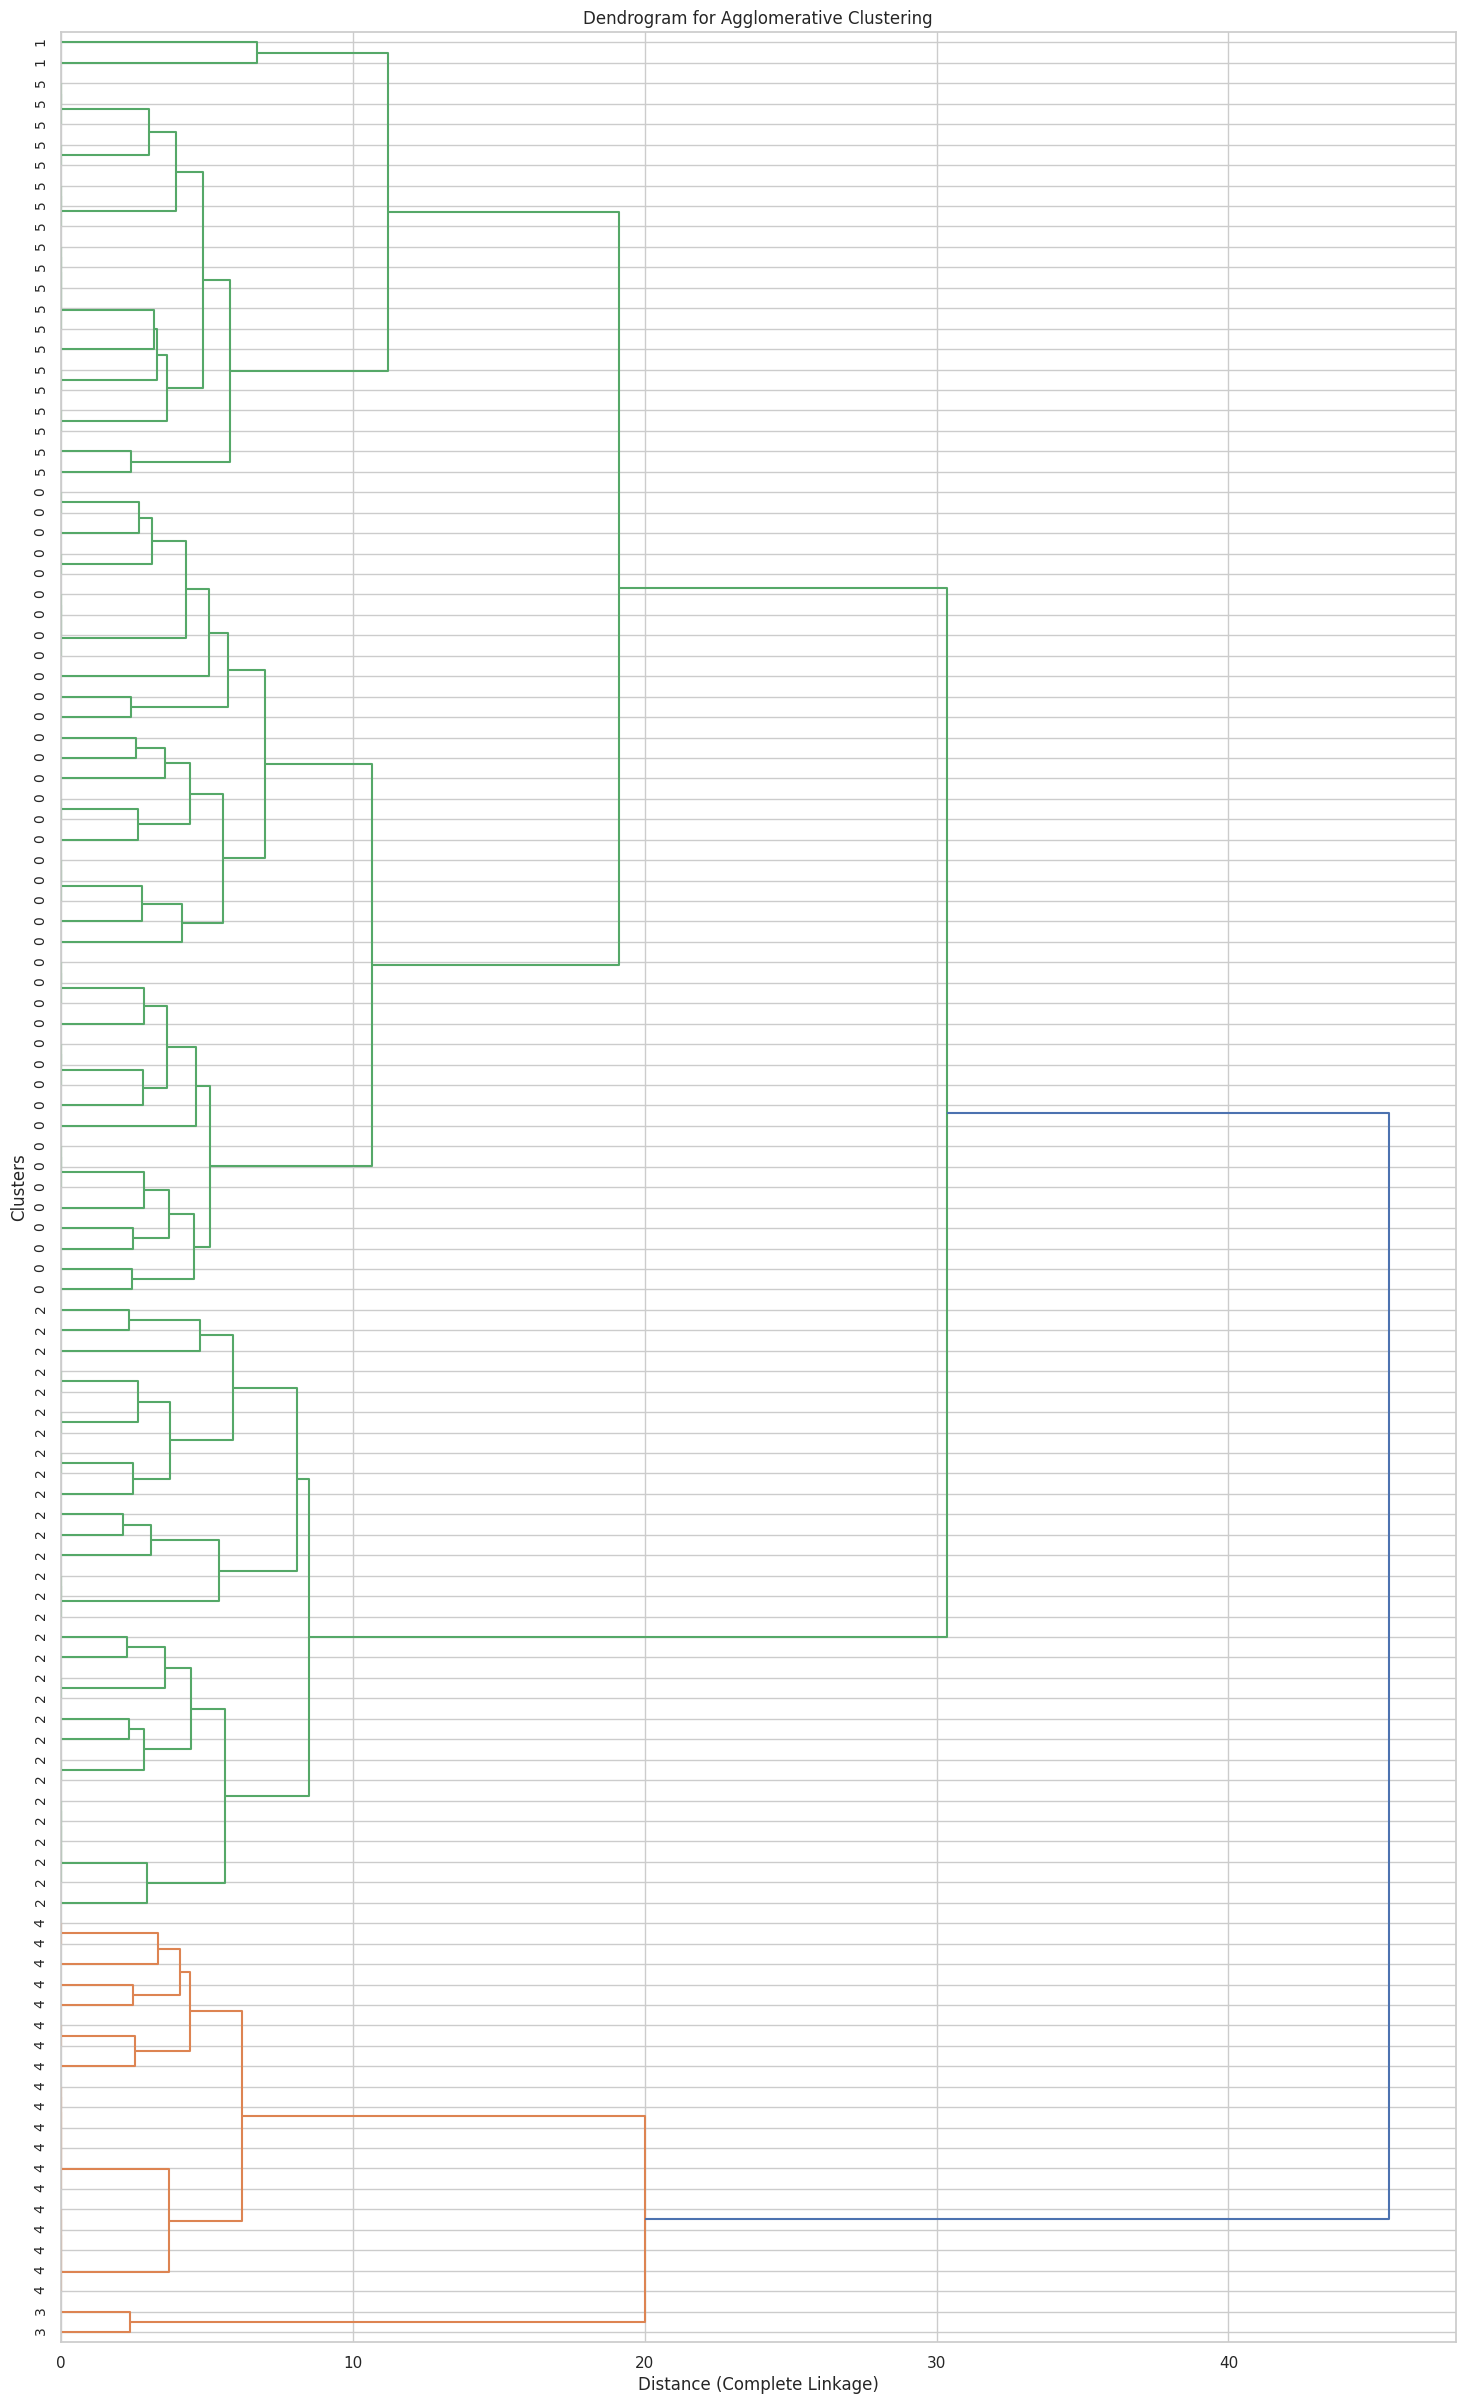

In [42]:
plt.figure(figsize=(18, 30))
dendrogram(
    Z,
    leaf_rotation=90.,  # Rotates the x-axis labels for better readability
    leaf_font_size=10.,  # Font size for the x-axis labels
    show_contracted=True,  # Displays a more compact tree
    labels = agglom.labels_,
    orientation='right'
)
plt.title("Dendrogram for Agglomerative Clustering", fontsize=12)
plt.ylabel('Clusters')
plt.xlabel('Distance (Complete Linkage)')
plt.show()


#**3. DBSCAN**

In [43]:
from sklearn.cluster import DBSCAN

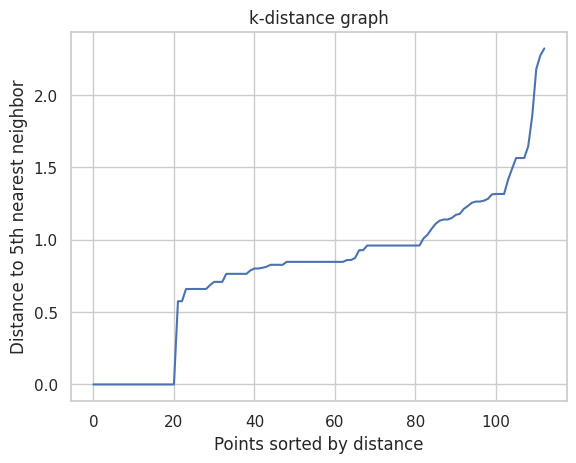

In [44]:
# generate a distance plot to determine the right epsilon value to use (use PCA applied data)
from sklearn.neighbors import NearestNeighbors

# select a k value to begin with
k = 5

nbrs = NearestNeighbors(n_neighbors=k).fit(transformed_zoom)
distances, indices = nbrs.kneighbors(transformed_zoom)
distances = np.sort(distances[:, k-1])

plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('k-distance graph')
plt.show()


In [45]:
# set parameters
eps = 1.4
min_samples = 6

# Apply DBSCAN on dataset without PCA applied
db = DBSCAN(eps=eps, min_samples=min_samples).fit(transformed_zoom)
labels = db.labels_


In [46]:
# get estimated number of clusters and noise data points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 6
Estimated number of noise points: 4


{0, 1, 2, 3, 4, 5, -1}


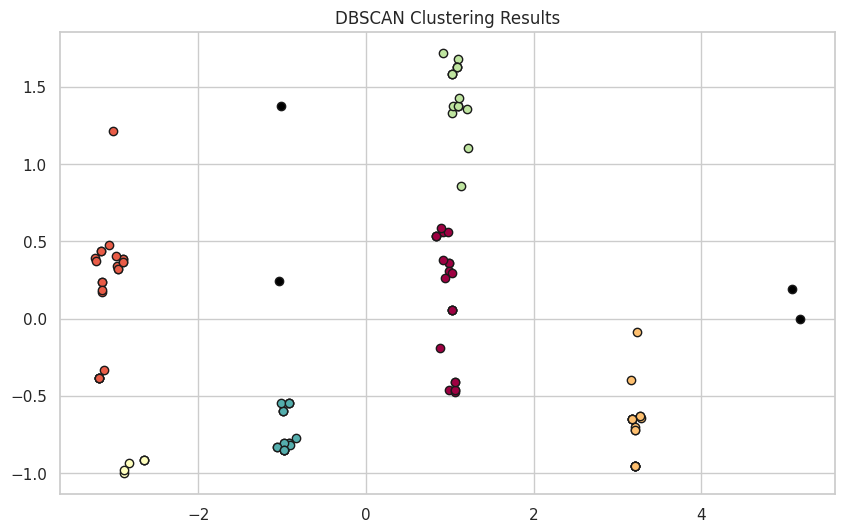

In [47]:
# visualize cclusters
unique_labels = set(labels)  # Get unique labels
print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot the core points
    xy = transformed_zoom[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering Results')
plt.show()